## Table of Contents

### 1. Data Loading and Preprocessing 
> #### 1.1 Load the Data
> #### 1.2 Data Exploration
> #### 1.3 Data Preprocessing
### 2. Image Segmentation through Clustering
> #### 2.1 Apply k-means clustering on the image
> #### 2.2 Filter the appropriate category
> #### 2.3 Calculate IoU score


---

### 1. Data Loading and Preprocessing

#### 1.1 Load the Data

In [1]:
# Upload data from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# get images
!unzip /content/drive/My\ Drive/images_BloodCellSegmentation.zip

Archive:  /content/drive/My Drive/images_BloodCellSegmentation.zip
  inflating: images_BloodCellSegmentation/001.bmp  
  inflating: images_BloodCellSegmentation/002.bmp  
  inflating: images_BloodCellSegmentation/003.bmp  
  inflating: images_BloodCellSegmentation/004.bmp  
  inflating: images_BloodCellSegmentation/005.bmp  
  inflating: images_BloodCellSegmentation/006.bmp  
  inflating: images_BloodCellSegmentation/007.bmp  
  inflating: images_BloodCellSegmentation/008.bmp  
  inflating: images_BloodCellSegmentation/009.bmp  
  inflating: images_BloodCellSegmentation/010.bmp  
  inflating: images_BloodCellSegmentation/011.bmp  
  inflating: images_BloodCellSegmentation/012.bmp  
  inflating: images_BloodCellSegmentation/013.bmp  
  inflating: images_BloodCellSegmentation/014.bmp  
  inflating: images_BloodCellSegmentation/015.bmp  
  inflating: images_BloodCellSegmentation/016.bmp  
  inflating: images_BloodCellSegmentation/017.bmp  
  inflating: images_BloodCellSegmentation/018.bmp

In [3]:
# get targets
!unzip /content/drive/My\ Drive/targets_BloodCellSegmentation.zip

Archive:  /content/drive/My Drive/targets_BloodCellSegmentation.zip
  inflating: targets_BloodCellSegmentation/001.png  
  inflating: targets_BloodCellSegmentation/002.png  
  inflating: targets_BloodCellSegmentation/003.png  
  inflating: targets_BloodCellSegmentation/004.png  
  inflating: targets_BloodCellSegmentation/005.png  
  inflating: targets_BloodCellSegmentation/006.png  
  inflating: targets_BloodCellSegmentation/007.png  
  inflating: targets_BloodCellSegmentation/008.png  
  inflating: targets_BloodCellSegmentation/009.png  
  inflating: targets_BloodCellSegmentation/010.png  
 extracting: targets_BloodCellSegmentation/011.png  
 extracting: targets_BloodCellSegmentation/012.png  
  inflating: targets_BloodCellSegmentation/013.png  
  inflating: targets_BloodCellSegmentation/014.png  
  inflating: targets_BloodCellSegmentation/015.png  
  inflating: targets_BloodCellSegmentation/016.png  
 extracting: targets_BloodCellSegmentation/017.png  
 extracting: targets_BloodCellS

#### 1.2 Data Exploration

In [0]:
# import libraries and modules
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# import kmeans
from sklearn.cluster import KMeans

In [0]:
# read sample image
img = Image.open('/content/images_BloodCellSegmentation/002.bmp')

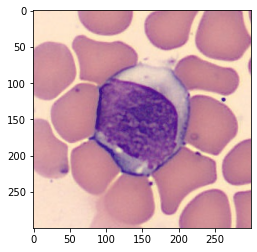

In [6]:
# plot image
plt.imshow(img)

In [7]:
# print type 
type(img)

PIL.BmpImagePlugin.BmpImageFile

In [0]:
# convert to numpy array
img = np.array(img)

In [9]:
# print shape of image
img.shape

(300, 300, 3)

In [0]:
# read sample target
gt_mask = Image.open('/content/targets_BloodCellSegmentation/002.png')

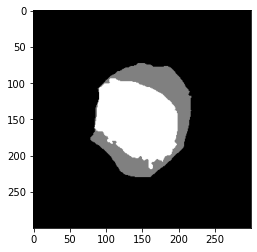

In [11]:
# plot target 
plt.imshow(gt_mask, cmap='gray')

In [0]:
# convert to numpy array
gt_mask = np.array(gt_mask)

In [13]:
# print target shape
gt_mask.shape

(300, 300)

#### 1.3 Data Preprocessing

In [14]:
# get unique values
np.unique(gt_mask)

array([  0, 128, 255], dtype=uint8)

In [0]:
# simplify unique values
gt_mask = ((gt_mask == 128) | (gt_mask == 255)).astype(int)

In [16]:
# get unique values again
np.unique(gt_mask)

array([0, 1])

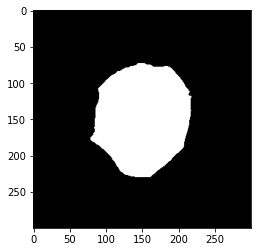

In [17]:
# plot cleaned target
plt.imshow(gt_mask, cmap='gray')

### 2. Image Segmentation through Clustering

![alt text](https://drive.google.com/uc?id=1WtWfeQarw1f3bcfl1QDp0tqH2-Zj9p2m)

#### 2.1 Apply k-means clustering on the image

In [0]:
# initialize kmeans with number of clusters as 5
kmeans = KMeans(n_clusters=5, random_state=0)

In [19]:
# reshape image
reshaped_image = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
reshaped_image.shape

(90000, 3)

In [20]:
# train kmeans model
kmeans.fit(reshaped_image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
# print categories per pixel
kmeans.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [22]:
# print shape of categories
kmeans.labels_.shape

(90000,)

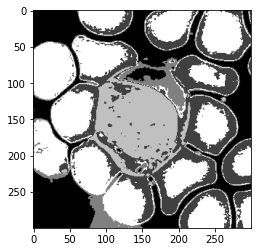

In [23]:
# reshape labels to mask
mask = kmeans.labels_
mask = mask.reshape(img.shape[0], img.shape[1])

# print shape of mask
mask.shape

# print mask
plt.imshow(mask, cmap='gray')

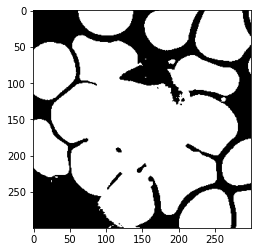

In [24]:
# initialize kmeans with number of clusters as 2
kmeans = KMeans(n_clusters=2, random_state=0)

# train kmeans model
kmeans.fit(reshaped_image)

# reshape labels to mask
mask = kmeans.labels_
mask = mask.reshape(img.shape[0], img.shape[1])
plt.imshow(mask, cmap='gray')

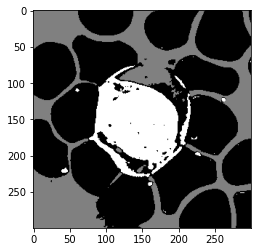

In [25]:
# initialize kmeans with number of clusters as 3
kmeans = KMeans(n_clusters=3, random_state=0)

# train kmeans model
kmeans.fit(reshaped_image)

# reshape labels to mask
mask = kmeans.labels_
mask = mask.reshape(img.shape[0], img.shape[1])
plt.imshow(mask, cmap='gray')

#### 2.2 Filter the appropriate category

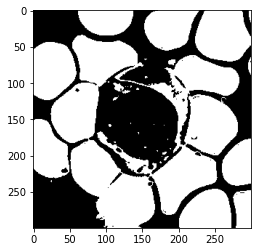

In [26]:
# get pixels with category 0
mask = (kmeans.labels_ == 0).astype(int)
mask = mask.reshape(img.shape[0], img.shape[1])
plt.imshow(mask, cmap='gray')

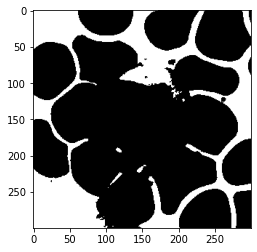

In [27]:
# get pixels with category 1
mask = (kmeans.labels_ == 1).astype(int)
mask = mask.reshape(img.shape[0], img.shape[1])
plt.imshow(mask, cmap='gray')

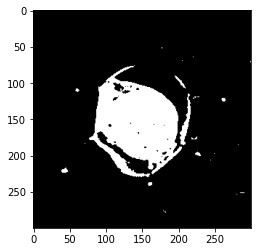

In [28]:
# get pixels with category 2
mask = (kmeans.labels_ == 2).astype(int)
mask = mask.reshape(img.shape[0], img.shape[1])
plt.imshow(mask, cmap='gray')

#### 2.3 Calculate IoU score

In [29]:
# make new numpy array of same values
pred = mask.ravel().copy()
target = gt_mask.ravel().copy()

# get class indices for WBC
pred_inds = pred == 1
target_inds = target == 1

# calculate intersection
intersection = pred_inds[target_inds].sum()

# calculate union
union = pred_inds.sum() + target_inds.sum() - intersection

# get IoU score
iou = (float(intersection) / float(max(union, 1)))
iou

0.6852816474863719